In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [26]:
df=pd.read_csv("C:/Users/DeLL/Desktop/HousingData.csv")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [27]:
# for missing values
df=df.interpolate()

In [28]:
df.rename(columns={'MEDV':'Target'},inplace=True)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,4.075,36.2


In [29]:
x = pd.DataFrame(np.array(df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]))
y = pd.DataFrame(np.array(df['Target']))

In [30]:
# trian test splite
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [32]:
#fitting the data
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [33]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
from sklearn.model_selection import cross_val_score

In [34]:
MSE=cross_val_score(lr,x_train,y_train,scoring='neg_mean_squared_error',cv=5)

In [35]:
np.mean(MSE)

-24.002497456084335

In [36]:
reg_pred=lr.predict(x_test)

In [37]:
reg_pred

array([[29.00773006],
       [36.34600706],
       [14.77865126],
       [25.03184222],
       [18.75605195],
       [23.1992219 ],
       [17.75311585],
       [14.47547473],
       [22.92833003],
       [20.65296868],
       [25.1701092 ],
       [18.542447  ],
       [-5.70773268],
       [21.71621582],
       [19.16834497],
       [23.90360466],
       [20.71922675],
       [ 5.99505751],
       [40.6377333 ],
       [17.60367353],
       [25.48444774],
       [30.2060661 ],
       [11.3827107 ],
       [23.16258292],
       [17.85073497],
       [15.84675794],
       [22.90558269],
       [14.6283032 ],
       [22.65881519],
       [19.21895991],
       [22.46051204],
       [25.15608126],
       [25.94184546],
       [17.58146809],
       [16.81662373],
       [16.94765862],
       [31.09146019],
       [20.09867717],
       [24.02642793],
       [25.35420783],
       [14.0573652 ],
       [32.33469767],
       [42.8859685 ],
       [17.32447249],
       [27.26861371],
       [16

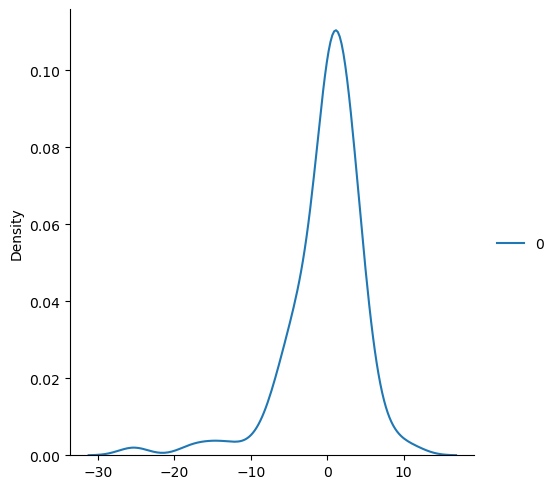

In [38]:
sns.displot(reg_pred-y_test,kind='kde')

In [39]:
from sklearn.metrics import r2_score

In [40]:
R_score=r2_score(y_test,reg_pred)

In [41]:
R_score

0.6664704787845827

Live testing

In [42]:
x1=np.array([[0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98]])
x1=sc.transform(x1)
y1=lr.predict(x1)
y1



array([[29.8865964]])